# Interaction of gammas in Xenon

In [1]:
import os
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy.testing as npt
from operator import itemgetter, attrgetter
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

2017-12-09 20:57:23


In [2]:
from math import sqrt, pi

In [3]:
from pynext.system_of_units import *

In [23]:
def mu_vs_e(npdata):
    return npdata[:,0] * MeV, npdata[:,1] * (cm2/g)

In [92]:
def latt(mu_over_rho, rho):
    mu = mu_over_rho * rho
    return 1 / mu

In [111]:
def select_energy(npdata, ene=0.5):
    return npdata[np.where(npdata[:,0] > ene)[0]]
   

In [112]:
rho_2020 = 124.3 * kg/m3
rho_3020 = 203.35 * kg/m3
rho_1520 = 89.9 * kg/m3
rho_1020 = 58 * kg/m3
rho_0520 = 30 * kg/m3
rho_0720 = 40 * kg/m3
rho_0920 = 50 * kg/m3
rho_list = [
('rho_2020' , rho_2020),
('rho_3020' , rho_3020),
('rho_1520' , rho_1520),
('rho_1020' , rho_1020),
('rho_0520' , rho_0520),
('rho_0720' , rho_0720),
('rho_0920' , rho_0920)
]
rho_ref = 5.8 * kg/m3

## Xenon mass atenuation coefficient

In [113]:
xenp = np.loadtxt('../data/mass_att_coeff.txt', comments='#', usecols=(0,1))

In [114]:
e, mu_over_rho = mu_vs_e(xenp)

In [115]:
e2, mu_over_rho2 = mu_vs_e(select_energy(xenp, ene=1))

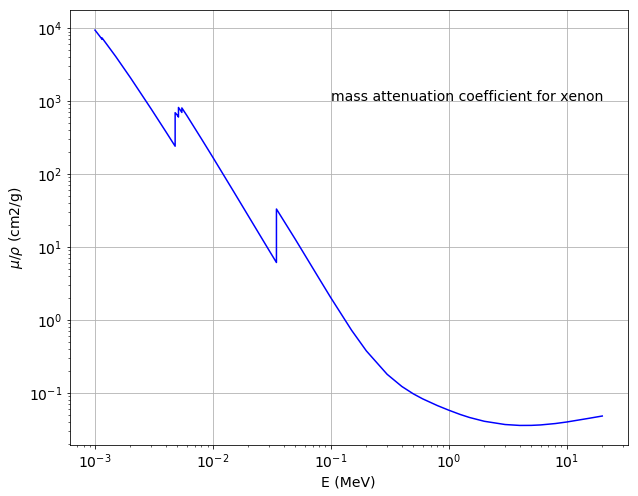

In [99]:
plt.loglog(e / MeV, mu_over_rho / (cm2/g),'b')
plt.grid(True)
plt.xlabel('E (MeV)')
plt.ylabel(r'$\mu/\rho$ (cm2/g)')
plt.text(0.1, 1000, r'mass attenuation coefficient for xenon')
plt.show()

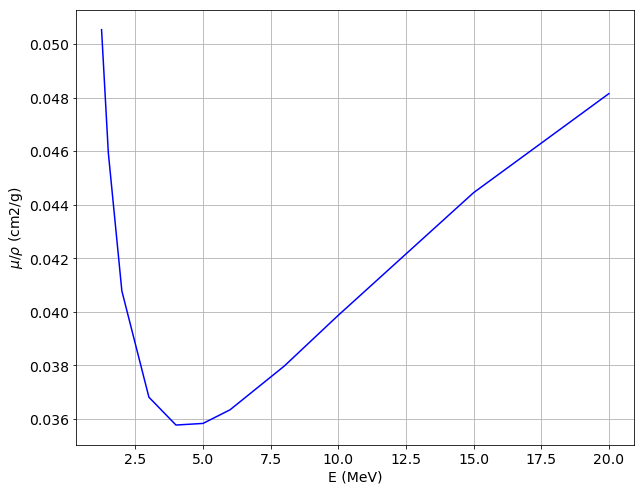

In [119]:
plt.plot(e2 / MeV, mu_over_rho2 / (cm2/g),'b')
plt.grid(True)
plt.xlabel('E (MeV)')
plt.ylabel(r'$\mu/\rho$ (cm2/g)')
#plt.text(0.1, 1000, r'mass attenuation coefficient for xenon')
plt.show()

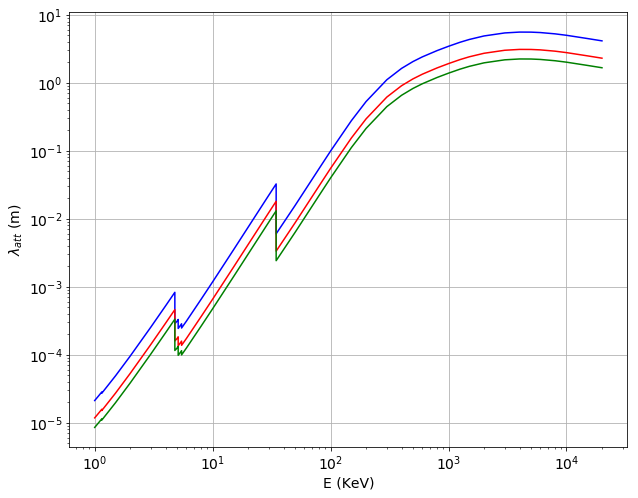

In [95]:
plt.loglog(e / keV, latt(mu_over_rho, rho_0920) / m, 'b')
plt.loglog(e / keV, latt(mu_over_rho, rho_1520) / m, 'r')
plt.loglog(e / keV, latt(mu_over_rho, rho_2020) / m, 'g')
plt.grid(True)
plt.xlabel('E (KeV)')
plt.ylabel(r'$\lambda_{att}$ (m)')
#plt.text(10**3, 0.1, r'$\lambda_{att}$ (m) for xenon at $\rho =${} g/cm3'.format(rho_0920 / (g/cm3)))
plt.show()

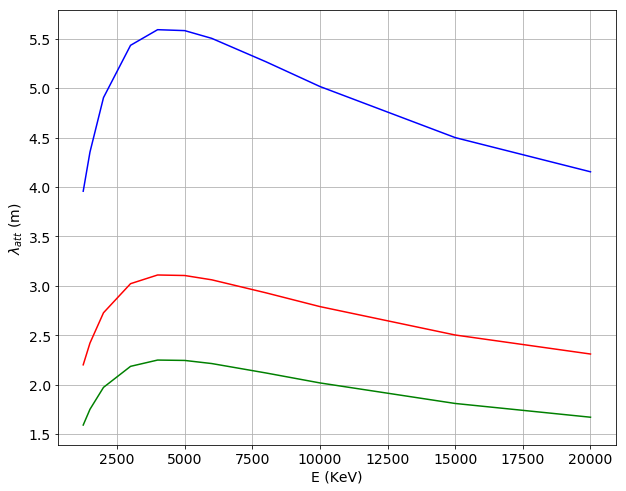

In [120]:
plt.plot(e2 / keV, latt(mu_over_rho2, rho_0920) / m, 'b')
plt.plot(e2 / keV, latt(mu_over_rho2, rho_1520) / m, 'r')
plt.plot(e2 / keV, latt(mu_over_rho2, rho_2020) / m, 'g')
plt.grid(True)
plt.xlabel('E (KeV)')
plt.ylabel(r'$\lambda_{att}$ (m)')
#plt.text(10**3, 0.1, r'$\lambda_{att}$ (m) for xenon at $\rho =${} g/cm3'.format(rho_0920 / (g/cm3)))
plt.show()